# Solution {-}

A sketch of a sample realization of a stationary random process $X(t)$ is shown in the figure below:

![](fig2.2.png)

(Hint: Think of sliding $X(t)$ an amount $\tau$ and multiply the result times the original $X(t)$)

Signal: [ 0  0  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4  4  4  4  4
  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0
  0  0  0  0]


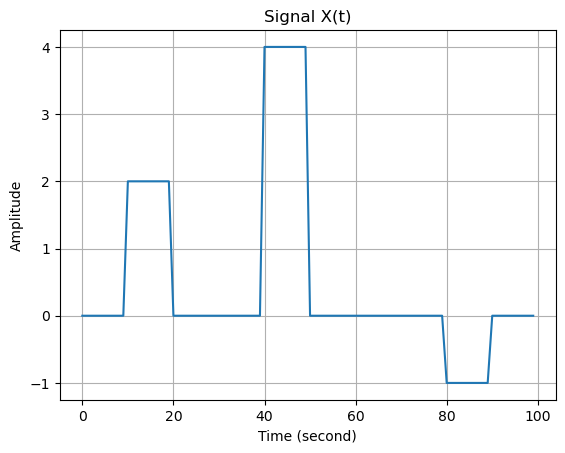

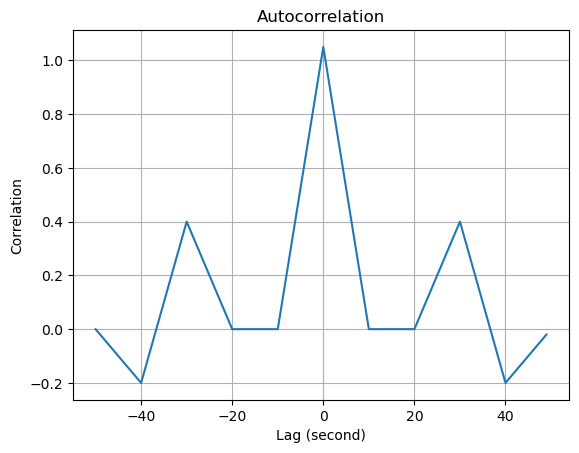

In [1]:
from numpy import array, arange, correlate
import matplotlib.pyplot as plt

# Defining amplitude
a1 = 2
a2 = 4
a3 = -1

# Generate signal vector
X = array(100*[0])
X[10:20] = a1; X[40:50] = a2; X[80:90] = a3
print(f"Signal: {X}")

# Plot signal
plt.plot(X)
plt.title("Signal X(t)")
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

def autocorr(x):
    return correlate(x, x, mode="same")/(2*len(x))

def autocorr2(x):
    """
    Compute autocorrelation without using numpy.correlate
    Implements the mathematical definition: R[tau] = sum(x[n] * x[n+tau])
    """
    N = len(x)
    result = array(N * [0.0])  # Initialize result array
    
    # Compute autocorrelation for each lag
    for tau in range(N):
        # Convert tau to centered lag index
        lag = tau - N//2
        correlation_sum = 0.0
        
        # Calculate the sum for this lag
        for t in range(N):
            t_shifted = t + lag
            if 0 <= t_shifted < N:  # Check bounds
                correlation_sum += x[t] * x[t_shifted]
        
        result[tau] = correlation_sum / (2 * N)  # Normalize
    
    return result

# Generate autocorrelation vector
t = arange(-50, 50)
R = autocorr(X)

# Plot autocorrelation
plt.plot(t, R)
plt.title("Autocorrelation")
plt.xlabel("Lag (second)")
plt.ylabel("Correlation")
plt.grid()
plt.show()

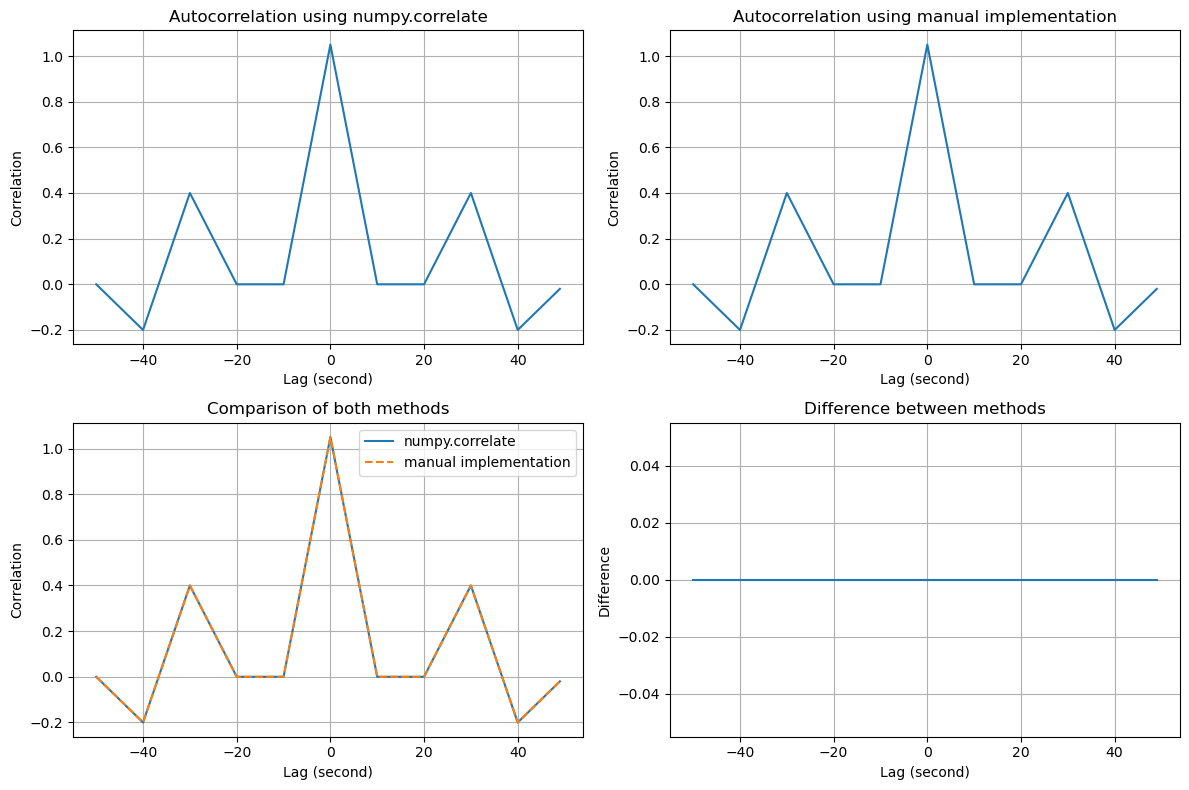

Maximum difference between methods: 0.0000000000


In [2]:
# Test and compare both autocorrelation functions
R1 = autocorr(X)   # Using numpy.correlate
R2 = autocorr2(X)  # Manual implementation

# Plot comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, R1)
plt.title("Autocorrelation using numpy.correlate")
plt.xlabel("Lag (second)")
plt.ylabel("Correlation")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, R2)
plt.title("Autocorrelation using manual implementation")
plt.xlabel("Lag (second)")
plt.ylabel("Correlation")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t, R1, label='numpy.correlate', linestyle='-')
plt.plot(t, R2, label='manual implementation', linestyle='--')
plt.title("Comparison of both methods")
plt.xlabel("Lag (second)")
plt.ylabel("Correlation")
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
diff = R1 - R2
plt.plot(t, diff)
plt.title("Difference between methods")
plt.xlabel("Lag (second)")
plt.ylabel("Difference")
plt.grid()

plt.tight_layout()
plt.show()

# Print maximum difference to check if they're equivalent
print(f"Maximum difference between methods: {max(abs(diff)):.10f}")